In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("sample.csv")
df.head()

,x,y
0,2,10
1,2,5
2,8,4
3,5,8
4,7,5


Text(0, 0.5, 'Y')

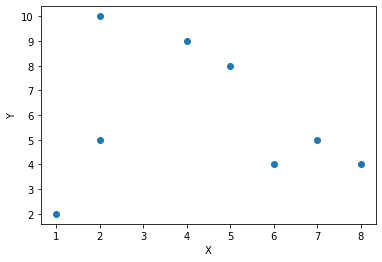

In [3]:
plt.scatter(df.x,df.y)
plt.xlabel('X')
plt.ylabel('Y')

In [4]:
km = KMeans(n_clusters=3)
km.fit(df)
km.labels_

array([0, 1, 2, 0, 2, 2, 1, 0])

In [5]:
km.predict([[0, 0], [12, 3]])

array([1, 2])

In [6]:
km.cluster_centers_

array([[3.66666667, 9.        ],
       [1.5       , 3.5       ],
       [7.        , 4.33333333]])

In [7]:
y_predicted = km.predict(df)
df['cluster']=y_predicted


In [8]:
df['cluster']

0    0
1    1
2    2
3    0
4    2
5    2
6    1
7    0
Name: cluster, dtype: int32

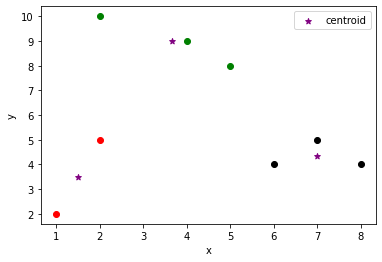

In [9]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.x,df1['y'],color='green')
plt.scatter(df2.x,df2['y'],color='red')
plt.scatter(df3.x,df3['y'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [10]:
sse = []
k_rng = range(1,9)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['x','y']])
    sse.append(km.inertia_)

C:\Users\shubdutta\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


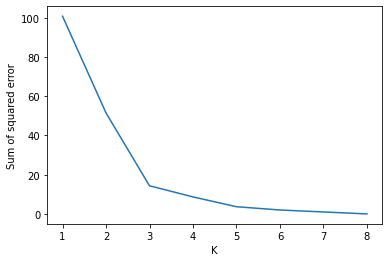

In [11]:

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

In [13]:
KMean= KMeans(n_clusters=2)
KMean.fit(df)
label=KMean.predict(df)

In [14]:
print(f'Silhouette Score(n=2): {silhouette_score(df, label)}')


Silhouette Score(n=2): 0.4071756094370709


In [15]:
KMean= KMeans(n_clusters=3)
KMean.fit(df)
label=KMean.predict(df)

In [16]:
print(f'Silhouette Score(n=3): {silhouette_score(df, label)}')


Silhouette Score(n=3): 0.5877241027748771


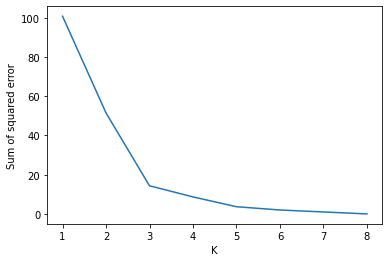

In [17]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [21]:
ss = []
k_rng = range(2,8)
for k in k_rng:
    KMean= KMeans(n_clusters=k)
    KMean.fit(df)
    label=KMean.predict(df)
    ss.append(silhouette_score(df, label))
    print(f'Silhouette Score(n={k}): {silhouette_score(df, label)}')

Silhouette Score(n=2): 0.4071756094370709
Silhouette Score(n=3): 0.5877241027748771
Silhouette Score(n=4): 0.4816384370945449
Silhouette Score(n=5): 0.3741439919944567
Silhouette Score(n=6): 0.15852567706292603
Silhouette Score(n=7): 0.03661165235168155


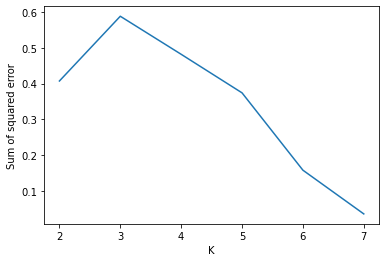

In [22]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(range(2,8),ss)

In [23]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
             [4, 2], [4, 4], [4, 0]])
clustering = AgglomerativeClustering().fit(X)
clustering
AgglomerativeClustering()
clustering.labels_

array([1, 1, 1, 0, 0, 0], dtype=int64)